In [ ]:
!unzip '/content/흡연.zip'

Archive:  /content/흡연.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [52]:
import pandas as pd
import numpy as np

In [53]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [54]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,TEST_0000,40,165,55,20.20,0.90,1,98,47,75,0.5,229,59,155,13.7,1,1.73
1,TEST_0001,65,145,50,23.78,0.50,0,99,59,98,0.6,200,65,115,12.2,1,1.00
2,TEST_0002,40,160,75,29.30,1.00,0,105,34,232,0.6,170,50,73,15.1,1,1.33
3,TEST_0003,30,180,90,27.78,1.35,0,78,45,218,0.9,197,55,98,15.2,1,0.89
4,TEST_0004,50,155,55,22.89,0.75,0,116,67,139,1.0,230,66,136,15.0,1,0.85


In [55]:
# 수치형--> 범주형
# 불필요한 id 제거
train_df = train_df.drop(columns=['ID'])
test_df = test_df.drop(columns=['ID'])

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        7000 non-null   int64  
 1   키(cm)     7000 non-null   int64  
 2   몸무게(kg)   7000 non-null   int64  
 3   BMI       7000 non-null   float64
 4   시력        7000 non-null   float64
 5   충치        7000 non-null   int64  
 6   공복 혈당     7000 non-null   int64  
 7   혈압        7000 non-null   int64  
 8   중성 지방     7000 non-null   int64  
 9   혈청 크레아티닌  7000 non-null   float64
 10  콜레스테롤     7000 non-null   int64  
 11  고밀도지단백    7000 non-null   int64  
 12  저밀도지단백    7000 non-null   int64  
 13  헤모글로빈     7000 non-null   float64
 14  요 단백      7000 non-null   int64  
 15  간 효소율     7000 non-null   float64
 16  label     7000 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 929.8 KB


In [57]:
#1 데이터를 가공하지 않은 상태에서 최선의 모델을 선택하고 학습한후 결과 제출
# 알고있는 모델 전부 적용... cross_validation  교차검증... 가장 우수한 모델선정
# 후보 :

In [58]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [59]:
from xgboost import XGBClassifier

In [60]:
models = [LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),
          ExtraTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

In [61]:
train_df['label'].value_counts()

0    4429
1    2571
Name: label, dtype: int64

In [62]:
x = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [63]:
from sklearn.model_selection import cross_validate,StratifiedKFold
skfold = StratifiedKFold(shuffle=True,random_state=42)
scores = []
for m in models:
  scores.append(cross_validate(m,x,y,cv=skfold,n_jobs=-1))

In [64]:
mean_scores = [ s['test_score'].mean() for s in scores]
mean_scores,  np.argmax(mean_scores)

([0.7092857142857143,
  0.665,
  0.6687142857142856,
  0.6657142857142857,
  0.729,
  0.7167142857142857,
  0.7212857142857143],
 4)

In [65]:
# best model
rfc = RandomForestClassifier()

In [66]:
rfc.fit(x,y)

RandomForestClassifier()

In [67]:
preds = rfc.predict(test_df)

In [68]:
result = pd.read_csv('/content/sample_submission.csv')
result['label'] = preds
result.to_csv('submit.csv',index=False)

데이터 변형

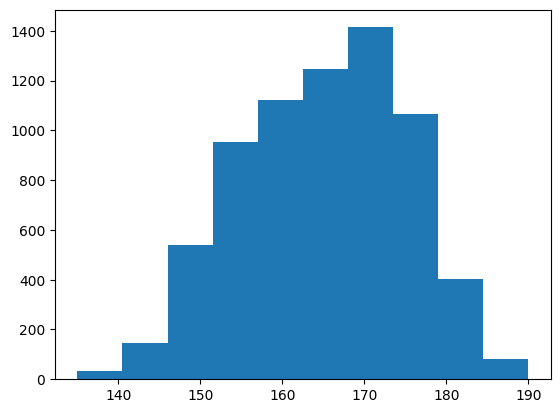

In [69]:
import matplotlib.pyplot as plt
plt.hist(train_df['키(cm)'])
plt.show()

In [70]:
bins=[140,150,160,170,180,190]
height_categories = np.digitize(train_df['키(cm)'],bins)
train_df['키(cm)'] = height_categories
height_categories = np.digitize(test_df['키(cm)'],bins)
test_df['키(cm)'] = height_categories

In [71]:
from tables.tests.common import test_filename
bins=[40,60,80,100,120]
weight_categories = np.digitize(train_df['몸무게(kg)'],bins)
train_df['몸무게(kg)'] = weight_categories
weight_categories = np.digitize(test_df['몸무게(kg)'],bins)
test_df['몸무게(kg)'] = weight_categories

In [72]:
bins=[18.5,23,25]
bmi_categories = np.digitize(train_df['BMI'],bins)
train_df['BMI'] = bmi_categories
bmi_categories = np.digitize(test_df['BMI'],bins)
test_df['BMI'] = bmi_categories

In [74]:
x = train_df.iloc[:, : -1]
y = train_df.iloc[:, -1]
rfc = RandomForestClassifier()
rfc.fit(x,y)
preds = rfc.predict(test_df)
result = pd.read_csv('/content/sample_submission.csv')
result['label'] = preds
result.to_csv('submit2.csv',index=False)

하이퍼파라메터 튜닝

In [75]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
gscv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=5,n_jobs=-1)
gscv.fit(x,y)